In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
from pathlib import Path

In [8]:
from crystal_clear.metadata import clean_meta, small_meta

In [11]:
np.unique(clean_meta().set_subset)

array(['large', 'medium', 'small'], dtype=object)

#### Load Metadata 

In [2]:
df_meta = pd.read_csv('./data/fma_metadata/tracks.csv', header=None)
def combine_list(list_1, list_2):
    l=[]
    for i in range(len(list_1)):
        l.append(list_1[i] + '_' + list_2[i])
    return(l)
        
columns = ['track_id'] + combine_list(df_meta.iloc[0,1:].values, df_meta.iloc[1,1:].values)
df_meta = df_meta.iloc[3:,:]
df_meta.columns = columns
df_meta.head()

/home/ludovic/miniconda3/envs/crystal_clear/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (0,1,5,6,8,12,18,20,21,22,24,33,34,38,39,44,47,49) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,track_id,album_comments,album_date_created,album_date_released,album_engineer,album_favorites,album_id,album_information,album_listens,album_producer,...,track_information,track_interest,track_language_code,track_license,track_listens,track_lyricist,track_number,track_publisher,track_tags,track_title
3,2,0,2008-11-26 01:44:45,2009-01-05 00:00:00,NaN,4,1,<p></p>,6073,NaN,...,NaN,4656,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1293,NaN,3,NaN,[],Food
4,3,0,2008-11-26 01:44:45,2009-01-05 00:00:00,NaN,4,1,<p></p>,6073,NaN,...,NaN,1470,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,514,NaN,4,NaN,[],Electric Ave
5,5,0,2008-11-26 01:44:45,2009-01-05 00:00:00,NaN,4,1,<p></p>,6073,NaN,...,NaN,1933,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1151,NaN,6,NaN,[],This World
6,10,0,2008-11-26 01:45:08,2008-02-06 00:00:00,NaN,4,6,NaN,47632,NaN,...,NaN,54881,en,Attribution-NonCommercial-NoDerivatives (aka M...,50135,NaN,1,NaN,[],Freeway
7,20,0,2008-11-26 01:45:05,2009-01-06 00:00:00,NaN,2,4,"<p> ""spiritual songs"" from Nicky Cook</p>",2710,NaN,...,NaN,978,en,Attribution-NonCommercial-NoDerivatives (aka M...,361,NaN,3,NaN,[],Spiritual Level


In [3]:
df_meta.columns

Index(['track_id', 'album_comments', 'album_date_created',
       'album_date_released', 'album_engineer', 'album_favorites', 'album_id',
       'album_information', 'album_listens', 'album_producer', 'album_tags',
       'album_title', 'album_tracks', 'album_type', 'artist_active_year_begin',
       'artist_active_year_end', 'artist_associated_labels', 'artist_bio',
       'artist_comments', 'artist_date_created', 'artist_favorites',
       'artist_id', 'artist_latitude', 'artist_location', 'artist_longitude',
       'artist_members', 'artist_name', 'artist_related_projects',
       'artist_tags', 'artist_website', 'artist_wikipedia_page', 'set_split',
       'set_subset', 'track_bit_rate', 'track_comments', 'track_composer',
       'track_date_created', 'track_date_recorded', 'track_duration',
       'track_favorites', 'track_genre_top', 'track_genres',
       'track_genres_all', 'track_information', 'track_interest',
       'track_language_code', 'track_license', 'track_listens',
  

### Split train and validation And choose genre(eventually?)

In [4]:
df_meta_small = df_meta[df_meta.set_subset == 'small']
np.unique(df_meta_small.track_genre_top)

array(['Electronic', 'Experimental', 'Folk', 'Hip-Hop', 'Instrumental',
       'International', 'Pop', 'Rock'], dtype=object)

In [5]:
genre = 'Rock'

In [6]:
df_meta_small.sample()

,track_id,album_comments,album_date_created,album_date_released,album_engineer,album_favorites,album_id,album_information,album_listens,album_producer,...,track_information,track_interest,track_language_code,track_license,track_listens,track_lyricist,track_number,track_publisher,track_tags,track_title
36255,54568,0,2011-10-05 17:01:43,NaN,NaN,0,10207,NaN,32885,NaN,...,NaN,1596,NaN,Attribution-NonCommercial-NoDerivatives (aka M...,1248,NaN,1,NaN,[],"Mil Amores, Santiago Huancayo"


### Check properties of file

In [27]:
import scipy
from scipy.signal import stft
import matplotlib.pyplot as plt
from crystal_clear.metadata import small_meta
from crystal_clear.prepare import open_random_file

In [29]:
song = open_random_file(small_meta())

samples = np.array(song.get_array_of_samples()).reshape(song.channels, -1, order='F')
sample_rate = song.frame_rate

sample_rate, samples.shape

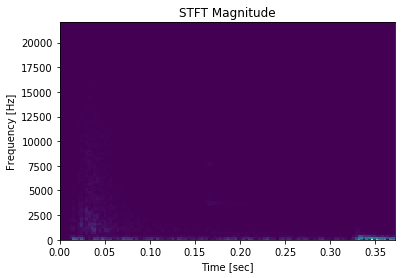

In [29]:
f, t, Zxx = scipy.signal.stft(samples, sample_rate)

plt.pcolormesh(t[:129], f, np.abs(Zxx)[0,:,:129], vmin=0)
plt.title('STFT Magnitude')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

In [30]:
len(np.abs(Zxx).shape)

3

In [35]:
from crystal_clear.prepare import *

In [32]:
data = np.abs(Zxx)
data.shape

(2, 129, 10338)

In [37]:
data_3D = make_into_3D(data)

In [49]:
np.pad(data_3D[:, :, :100], ((0,0), (0,0) , (0, 29)), mode='constant').shape

(3, 129, 129)

In [58]:
make_3D_into_square(data_3D)[0][0].shape

(3, 129, 129)